<a href="https://colab.research.google.com/github/macodebcn/datascience_samples/blob/main/%232_visualization%20%26%20more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['Año', 'Hidráulica', 'Nuclear', 'Carbón', 'Eólica',
       'Solar fotovoltaica', 'Cogeneración', 'Otras renovables'],
      dtype='object')

    Año  Hidráulica  Nuclear  Carbón  Eólica  Solar fotovoltaica  \
0  2008       22935    56460   46508   32160                2498   
1  2009       26186    50549   34793   38253                6072   
2  2010       41834    59242   23701   43545                6423   
3  2011       30437    55006   43177   42477                7441   
4  2012       20654    58595   53780   48525                8202   

   Cogeneración  Otras renovables  
0         24223              2078  
1         26001              2516  
2         28111              2459  
3         30593              3714  
4         32444              3791  


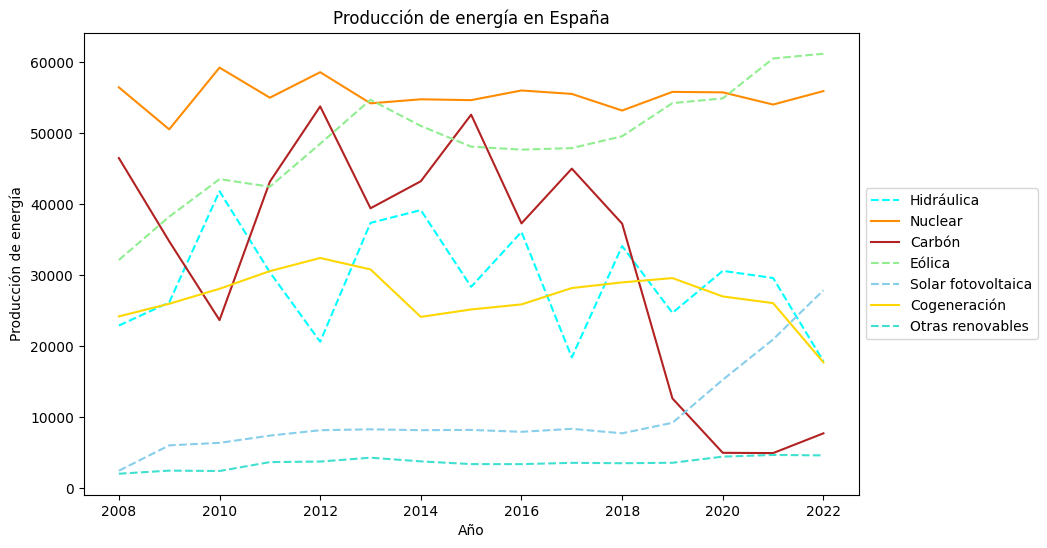

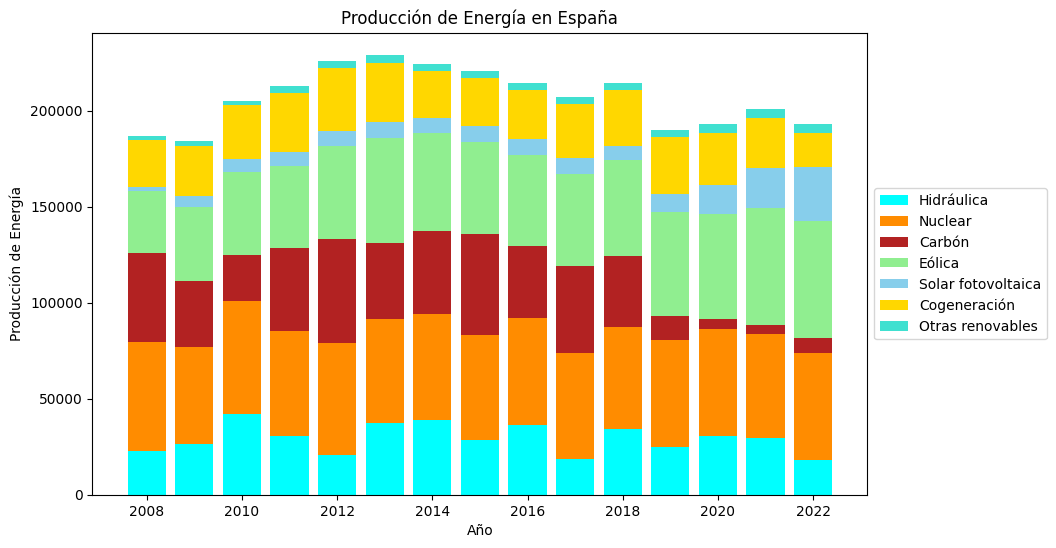

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

elec = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/prog_datasci_8/data/energy_production_spain.csv")

print(elec.columns)

print()

print(elec.head(n=5))

# vamos a crear con la ayuda de <matplotlib> los gráficos pertinentes
# en primer lugar un gráfico de líneas que nos ayuda a comprobar la evolución
# de los datos, en segundo lugar, un gráfico de barras apiladas,

# primero, crearemos un par de listas en las que definimos las fuentes en dos
# categorías: renovables, no renovables

renovables = ["Hidráulica", "Eólica", "Solar fotovoltaica", "Otras renovables"]
no_renovables = ["Nuclear", "Carbón", "Cogeneración"]

# como vamos a crear un par de gráficos, uno de líneas y otro de barras,
# necesitaremos distinguirlos claramente, así que vamos a utilizar los mismos
# colores para que todo sea más uniforme

colores_renovables = ["aqua", "lightgreen", "skyblue", "turquoise"]
colores_no_renovables = ["darkorange", "firebrick", "gold"]

# creamos la figura como ya sabemos, primer parámetro ancho, segundo alto

plt.figure(figsize=(10,6))

# a continuación vamos a añadir como variable independiente en el eje x el año

for columna in elec.columns:
    if columna in renovables:
        plt.plot(elec["Año"], elec[columna], linestyle="dashed", color=colores_renovables[renovables.index(columna)], label=columna)
    elif columna in no_renovables:
        plt.plot(elec["Año"], elec[columna], linestyle="solid", color=colores_no_renovables[no_renovables.index(columna)], label=columna) # ojo aquí color=

# agregamos los correspondientes títulos y leyendas

plt.title("Producción de energía en España")
plt.xlabel("Año")
plt.ylabel("Producción de energía")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# finalmente mostramos el gráfico

plt.show()

print()


# b, ahora vamos a recrear el mismo gráfico utilizando un tipo de gráfico de
# barras apiladas, que nos permitirá analizar lo datos desde otra perspectiva


# repetimos básicamente la misa operación

plt.figure(figsize=(10,6))

# aquí añadiremos las barras al gráfico, esto podemos consultarlo aquí:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html
# <np.zeros> se utiliza para generar la base (de ceros) en la que se va
# acumulando la información, es algo así como el cimiento del gráfico
# este bucle recorre las columnas de <elec> excluyendo la columna del año,
# comprueba si pertenece a la lista de renovables o no renovables, y entonces
# crea el gráfico de barras, las barras se apilan gracias al parámetro "bottom"
# cada vez que el bucle itera, se actualiza ese valor, "bottom", al que se le
# agrega los nuevos valores de la columna actual

bottom = np.zeros(len(elec["Año"]))
for i, columna in enumerate(elec.columns[1:]):
    # fuera la columna "año", "slicing" para decir todas a partir de la segunda
    if columna in renovables:
        plt.bar(elec["Año"], elec[columna], bottom=bottom, color=colores_renovables[renovables.index(columna)], label=columna)
        bottom += np.array(elec[columna])
    elif columna in no_renovables:
        plt.bar(elec["Año"], elec[columna], bottom=bottom, color=colores_no_renovables[no_renovables.index(columna)], label=columna)
        bottom += np.array(elec[columna])

# Añadir títulos y leyenda
plt.title("Producción de Energía en España")
plt.xlabel("Año")
plt.ylabel("Producción de Energía")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

# ¿crees que uno de los dos gráficos es mejor que el otro para representar estos datos?
# veamos, dado que en el enunciado del ejercicio se nos pide analizar las tendencias
# quizás nos sería más útil consultar el primero de los gráficos, esto se debe
# a que podemos ir siguiendo la evolución de una fuente de energía según el año
# de alguna forma el cerebro interpreta esa línea como una especie de historia
# temporal sin tener que entrar en muchas explicaciones (suponiendo que nos
# estamos dirigiendo a una audiencia que quiere ver rápido una tendencia)
# cojamos por ejemplo el carbón, digamos que mirando la línea podemos adivinar
# de forma sencilla cuál es la tendencia, es decir, a pesar de que también
# podemos comparar esa línea con el resto, de alguna forma tiene una entidad
# individual que de alguna forma se diluye al ver la misma energía puesta apilada
# como en el segundo gráfico
# del primer gráfico respecto al segundo se extrae rápidamente cuáles son las
# progresiones temporales de cada energía, de modo que es bastante sencillo
# inferir de un solo vistazo que el carbón no está en su mejor momento, o que
# la energía nuclear se mantiene bastante regular en el tiempo; de la misma forma
# se pueden apreciar detalles como las oscilaciones en energía eólica (claro, en
# función de si hay o no viento...)
# en cuanto al segundo gráfico, nos encontramos con que es más sencillo de ver
# en qué medida ha aumentado la producción de determinada energía de un sólo
# vistazo, al estar todas agrupadas es muy intuitivo, incluso ver cómo varía
# la producción total por año
# en resumen: quizás no hay uno mejor que otro, sino que ambos resultarían
# complementarios en un escenario real; para el ejercicio, nos quedamos con el 1



### Ejercicio 2
Estados Unidos es uno de los países con un mercado del transporte aéreo más desarrollado de todo el mundo. Este mercado está dominado principalmente por 4 aerolíneas distintas. Estas aerolíneas operan un modelo de "hub and spoke" en el que utilizan aeropuertos "hub" para conectar otros dos aeropuertos con menos demanda. Utilizando los archivos ``data/airports_us.csv`` y ``data/routes_us.csv`` y la librería networkx, podremos ver la naturaleza de estas redes de rutas.

a) Lee los archivos ``data/airports_us.csv`` y ``data/routes_us.csv`` y muestra las primeras 5 líneas. $\color{green}{\text{NM}}$

b) Crea una variable de tipo lista llamada ```nodes``` con los aeropuertos que contienen al menos una ruta y una variable de tipo diccionario llamada ```pos``` que será necesario para posicionar los nodos. Este diccionario debe ser de la forma ```{node_1: [x, y]}``` donde node_1 es el código del aeropuerto y `x` e `y` son la longitud y la latitud respectivamente.
$\color{green}{\text{NM}}$

c) Crea una variable de tipo pandas.DataFrame llamada nodos con todas las rutas (columnas: 'source', 'dest'). Añade una columna que indique el ancho y la flecha de forma que sea 0.05 unidades multiplicado por el número de aerolíneas que operan aquella ruta de forma que si:
- Opera 1 aerolínea -> Ancho: 0.05
- Operan 2 aerolíneas -> Ancho: 0.1
- Operan 3 aerolíneas -> Ancho: 0.15
- Operan 4 aerolíneas -> Ancho: 0.20

$\color{green}{\text{NM}}$

d) Crea el grafo añadiendo nodos y ejes. Es necesario que el gráfico cumpla las siguientes condiciones:
- La figura debe tener un tamaño de 10x8.
- Los nodos deben tener un tamaño de 10 puntos por cada ruta que se opera desde ese aeropuerto.
- Si un aeropuerto tiene más de 20 rutas, es necesario mostrar su código dentro del nodo (```airport_code```). El tamaño de la fuente debe ser de 8 puntos.

$\color{orange}{\text{EG}}$**


Index(['airport_code', 'name', 'lat', 'lon'], dtype='object')

Index(['airline', 'airline_id', 'source', 'source_id', 'dest', 'dest_id',
       'codeshare', 'stops', 'equipment'],
      dtype='object')

  airport_code                       name        lat         lon
0          ORL  Orlando Executive Airport  28.545500  -81.332901
1          BED   Laurence G Hanscom Field  42.470001  -71.289001
2          OSC   Oscoda Wurtsmith Airport  44.451599  -83.394096
3          OAR   Marina Municipal Airport  36.681900 -121.762001
4          MHR  Sacramento Mather Airport  38.553902 -121.297996

  airline  airline_id source  source_id dest  dest_id codeshare  stops  \
0      AA          24    ABQ       4019  ORD     3830         Y      0   
1      AA          24    ALB       3864  CLT     3876       NaN      0   
2      AA          24    ALB       3864  DCA     3520         Y      0   
3      AA          24    ATL       3682  CLT     3876         Y      0   
4      AA          24    ATL       3

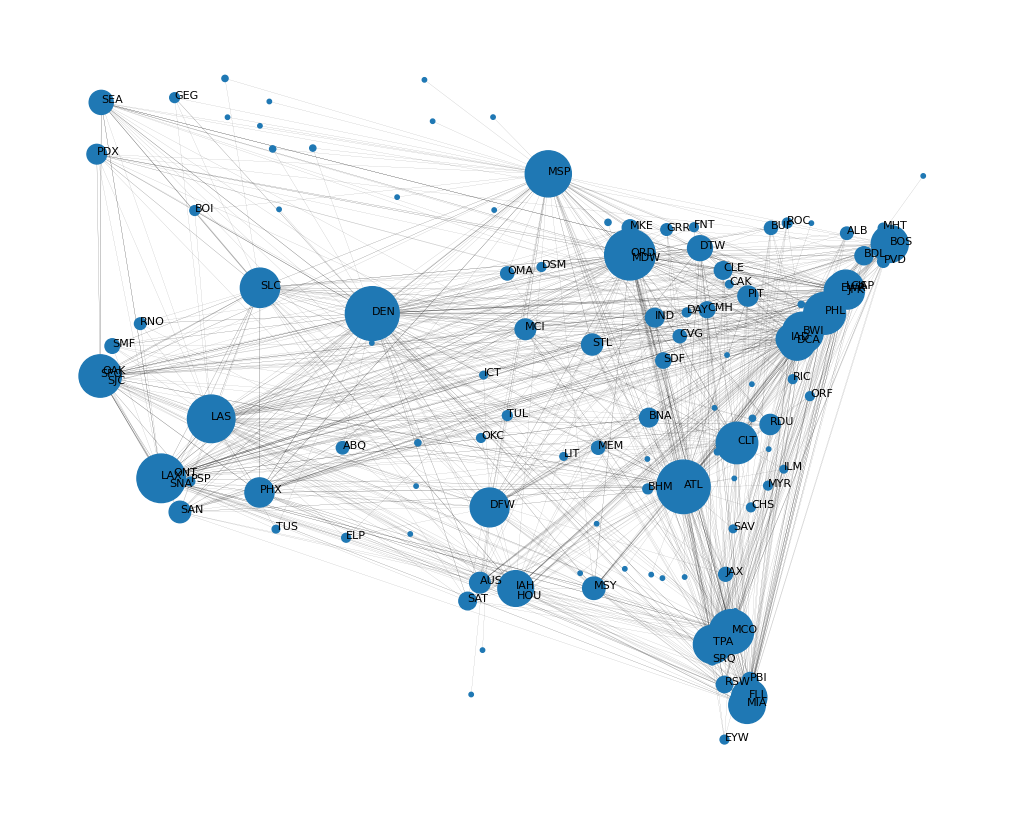

In [ ]:
# Respuesta

# vamos a necesitar la librería networkx
import networkx as nx

aero = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/prog_datasci_8/data/airports_us.csv")
rut =  pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/prog_datasci_8/data/routes_us.csv")

print(aero.columns)
print()
print(rut.columns)

print()

print(aero.head(n=5))
print()
print(rut.head(n=5))

print()

# vamos a crear la variable <nodes> con los aeropuerto que al menos tienen una
# ruta; esto lo hacemos creando una lista en la que pasamos el la función <set>
# de Python para evitar que cuando hagamos el gráfico tengamos duplicados
# https://docs.python.org/3/tutorial/datastructures.html#sets:~:text=A%20set%20is%20an%20unordered%20collection%20with%20no%20duplicate%20elements.
# en resumen, esta variable contiene los valores únicos de las columnas
# "source" y "dest", es decir, los códigos de los aeropuestos de origen y destino
# que vamos a utilizar para iterar por ella más adelante en el ejercicio

nodes = list(set(rut["source"]).union(set(rut["dest"])))

# a continuación creamos un diccionario con las posiciones, utilizamos un viejo
# conocido de otras prácticas, el método <loc> de pandas

print()
# aquí creamos una lista vacía que será la que iremos completando con cada bucle
pos = {}

for airport in nodes:
    lon = aero.loc[aero["airport_code"]== airport, "lon"].values[0]
    lat = aero.loc[aero["airport_code"]== airport, "lat"].values[0]
    # añadimos al diccionario la entrada <pos> que contiene longitud
    # y latitud del aeropuerto, de modo que podremos consultar ambas coordenadas
    # añadiendo al diccionario <pos> la longitud y latitud que previamente hemos
    # obtenido mediante el bucle
    pos[airport] = [lon, lat]

print()

# ahora vamos a crear una variable de tipo <pandas.DataFrame> con todas las
# rutas con las indicaciones del apartado c
# tal y como hemos venido haciendo en anteriores prácticas, optamos por hacer
# una copia de <rut> que manipularemos para conservar la original intacta
# a continuación agrupamos por salida, destino y tomamos de la columna de la
# los valores únicos de aerolíneas
# nunique https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html
# luego, multiplicamos por el 0.05 que se nos indica, y esto se almacena todo
# en una nueva columa llamada <ancho>

nodos = rut[["source", "dest"]].copy()
nodos["ancho"] = rut.groupby(["source", "dest"])["airline"].transform("nunique")*0.05

print()

# comprobamos que se ha agregado la columna en cuestión
print(nodos.head(5))

# a continuación vamos a crear el grafo, esto está explicado aquí
# https://networkx.org/documentation/stable/tutorial.html

G= nx.Graph()

# ahora vamos a agregar los nodos al grafo, para ello utilizaremos un bucle
# G.add_node añade al grafo cada aeropuesto en forma de nodo, estableciendo el
# tamaño de diez puntos, básicamente el bucle hace lo siguiente:
# <node> es la variable temporal que recorre <nodes> (la lista con los códigos
# de los aeropuertos que creamos al principio con las salidas y destinos)
# de la que seleccionamos o la salida o la llegada y que se agrega al grafo G
# mediante la función <G.add_node>
# existe un ejemplo similar aquí:
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_node.html#:~:text=G%20%3D%20nx.Graph()%20%20%23%20or%20DiGraph%2C%20MultiGraph%2C%20MultiDiGraph%2C%20etc%0A%3E%3E%3E%20G.add_node(1)%0A%3E%3E%3E%20G.add_node(%22Hello%22)%0A%3E%3E%3E%20K3%20%3D%20nx.Graph(%5B(0%2C%201)%2C%20(1%2C%202)%2C%20(2%2C%200)%5D)%0A%3E%3E%3E%20G.add_node(K3)%0A%3E%3E%3E%20G.number_of_nodes()

for node in nodes:
    G.add_node(node, size=10*rut[(rut["source"] == node) | (rut["dest"] == node)].shape[0])

# a continuación añadimos los ejes
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html
# https://stackoverflow.com/questions/54610409/how-to-change-the-size-of-the-edge-line-in-netowrkx-graph
# lo que aquí hacemos es añadir el ancho en función de la cantidad de aerolíneas
# que operan la ruta, algo que definimos arriba con:
# <nodos["ancho"] = rut.groupby(["source", "dest"])["airline"].transform("nunique")*0.05>
for i in range(len(nodos)):
    G.add_edge(nodos.iloc[i]["source"], nodos.iloc[i]["dest"], width=nodos.iloc[i]["ancho"])

# una vez tenemos creado el grafo y añadido los nodos, pasamos al gráfico

plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=False, node_size=[attr["size"] for (node, attr) in G.nodes(data=True)],
        width=[attr["width"] for (u, v, attr) in G.edges(data=True)])

# por defecto las etiquetas se muestran si indicamos <with_labels=True>, pero
# la información es imposible de leer con claridad de ahí que a continuación
# vamos a generar las etiquetas por separado según se indica
# de nuevo utlizaremos un bucle para hacerlo
# https://networkx.org/documentation/stable/tutorial.html#:~:text=nx.draw(G%2C%20with_labels%3DTrue%2C%20font_weight%3D%27bold%27)
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.nodes.html#:~:text=list(G.nodes(data%3DTrue))
# con <data=True> lo que hacemos es incluir el tamaño <size> del nodo

for node, attr in G.nodes(data=True):
    if attr["size"] >20:
        plt.text(pos[node][0], pos[node][1], s=node, fontsize=8)

# finalmente, mostramos el gráfico

plt.show()



### Ejercicio 3
Geopandas permite leer y representar datos geoespaciales de forma muy fácil. Utilizaremos estos datos para representar el mapa de los estados territoriales de Estados Unidos.

a) Lee el fichero ```data/usa-states-census-2014.shp```, guárdalo en una variable llamada ```df_states``` y muestra qué tipo de variable es y las 5 primeras hileras. $\color{green}{\text{NM}}$

b) Indica qué codificación CRS utiliza este dataset. $\color{red}{\text{EI}}$ **

c) Utilizando solo ```geopandas``` y ```matplotlib``` crea una figura en la que muestres las fronteras de los diferentes estados territoriales (incluyendo las marítimas). Esta figura debe cumplir las siguientes condiciones: $\color{red}{\text{EI}}$
- La figura debe tener un tamaño de 10x8.
- El fondo de los estados debe ser blanco.
- Las fronteras deben ser azules.
- Los nombres de los estados deben ser negros utilizando una fuente de tamaño 6.

d) Crea una figura donde se vean las rutas representadas en la actividad 2 superpuestas en el mapa creado en esta actividad. **(Opcional)**


<class 'geopandas.geodataframe.GeoDataFrame'>

  STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0      06  01779778  0400000US06    06     CA            California   00   
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region  \
0  403483823181  20483271881       West   
1     158350578     18633500  Northeast   
2  138903200855  31407883551  Southeast   
3  148963503399   4947080103  Southeast   
4  214045425549   2397728105       West   

                                            geometry  
0  MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...  
1  POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...  
2  MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...  
3  POLYGON Z ((-

<ipython-input-5-e6732a8ce543>:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(df_states.geometry.centroid.x, df_states.geometry.centroid.y, df_states["NAME"]):


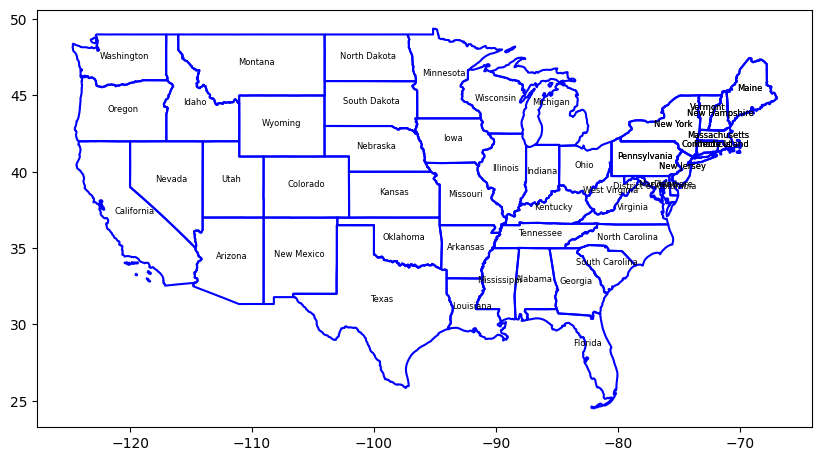

In [ ]:
# Respuesta

import geopandas as gpd
import matplotlib.pyplot as plt

# para leer el archivo en cuestión nos remitimos a la página de geopandas
# https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html

df_states = gpd.read_file("/content/drive/MyDrive/Colab_Notebooks/prog_datasci_8/data/usa-states-census-2014.shp")
print()
# mostramos el tipo de variable
print(type(df_states))
print()

# por último llamamos a las primeras cinco filas para echar un primer vistazo
print(df_states.head())
print()
# como siempre hacemos, vamos a ver el nombre de las columnas

print(df_states.columns)
print()

# a continuación vamos a conocer la codificación CRS, esto significa que como
# se indica en el siguiente enlace, es el sistema de coordenadas
# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.crs.html

print("Este es el 'crs': ",df_states.crs)

# una vez tenemos la codificación, pasamos a las figuras
# en este caso utilizaremos el "estilo subplots" ("object-oriented style")
# https://matplotlib.org/stable/users/explain/quick_start.html#quick-start

fig, ax = plt.subplots(1,1,figsize=(10, 8))
ax.set_facecolor("white")
df_states.boundary.plot(ax=ax, color="blue")

# con este bucle, recorremos cada estado en el "GeoDataFrame"
# para cada estado, obtenemos las coordenadas x e y del centroide del Estado,
# punto central que representa al estado; también obtenemos el nombre del Estado

for x, y, label in zip(df_states.geometry.centroid.x, df_states.geometry.centroid.y, df_states["NAME"]):
    # <ha="center"> para centrar mejor los nombres en el gráfico
    # con ax.test añadimos los nombres al gráfico
    ax.text(x, y, label, fontsize=6, ha="center")
#

# mostramos el gráfico

plt.show()

# obtenemos una advertencia que nos dice que debemos reproyectar, esto significa
# en resumen que hay que cambiar las coordenadas porque las nuestras podrían no
# ser adecuadas, esto se hace con el método <to_crs> en el "GeoDataFrame"
# copiamos el código en la siguiente celda y comprobar que no se muestra el
# mensaje de advertencia



<class 'geopandas.geodataframe.GeoDataFrame'>

  STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0      06  01779778  0400000US06    06     CA            California   00   
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region  \
0  403483823181  20483271881       West   
1     158350578     18633500  Northeast   
2  138903200855  31407883551  Southeast   
3  148963503399   4947080103  Southeast   
4  214045425549   2397728105       West   

                                            geometry  
0  MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...  
1  POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...  
2  MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...  
3  POLYGON Z ((-

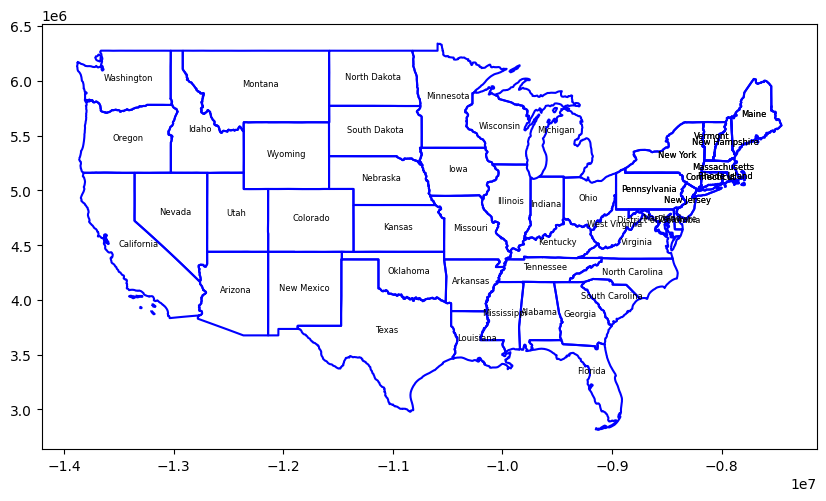

In [ ]:
# copia del código anterior con la reproyección

# añadimos: una copia de los datos para que se vean las diferencias
# al parecer la que aquí utilizamos la utilizan plataformas como Google Maps
# https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset
# el denominado "Web Mercator"...aunque en la página de "geopandas" también
# tenemos indicaciones sobre el asunto de la reproyección:
# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html#geopandas.GeoDataFrame.to_crs
# una nueva proyección, esto lo he encontrado en:
# mantenemos el añadido "ha='center'" para que los nombres no aparezcan tan a la
# derecha de los diferentes Estados; nótese que hemos asignado el nuevo "CRS"
# a la variable <df_states_proyectado> para ver las modificaciones impresas, así
# todo queda más claro

# a continuación el código copiado con las modificaciones señaladas, el resto
# se ha incluído en los bucles, etc., para su correcto funcionamiento

# para leer el archivo en cuestión nos remitimos a la página de geopandas
# https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html

df_states = gpd.read_file("/content/drive/MyDrive/Colab_Notebooks/prog_datasci_8/data/usa-states-census-2014.shp")
print()

# modificación: copia del conjunto de datos para que no se chafen al ejecutar
# a la derecha el original que copiamos en la variable df_states_copy

df_states_copy = df_states.copy()

# mostramos el tipo de variable
print(type(df_states))
print()

# por último llamamos a las primeras cinco filas para echar un primer vistazo
print(df_states_copy.head())
print()

# como siempre hacemos, vamos a ver el nombre de las columnas

print(df_states_copy.columns)
print()

# a continuación vamos a conocer la codificación CRS, esto significa que como
# se indica en el siguiente enlace, es el sistema de coordenadas
# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.crs.html

print("Este es el 'crs' original: ",df_states_copy.crs)

# modificación: proyectamos ahora a otro CRS para eliminar el mensaje

df_states_proyectado = df_states_copy.to_crs("EPSG:3857")

print("Este es el 'crs' reproyectado: ", df_states_proyectado.crs)

# una vez tenemos la codificación, pasamos a las figuras

fig, ax = plt.subplots(1,1,figsize=(10, 8))
ax.set_facecolor("white")
df_states_proyectado.boundary.plot(ax=ax, color="blue")

# explicar bucle

for x, y, label in zip(df_states_proyectado.geometry.centroid.x, df_states_proyectado.geometry.centroid.y, df_states_proyectado["NAME"]):
    # aquí hemos incluído df_states_proyectado en el bucle
    ax.text(x, y, label, fontsize=6, ha="center")

# mostramos el gráfico

plt.show()

# obtenemos una advertencia que nos dice que debemos reproyectar, así que
# buscamos información sobre el asunto y al parecer se suele reproyectar
# con otras coordenadas que eliminarían el error
# copiaremos el código en la siguiente celda para que se vea la diferencia


### Ejercicio 4

La librería ipywidgets nos permite crear interfaces de usuario para introducir los datos en nuestras aplicaciones de forma más cómoda e intuitiva. Este ejercicio consiste en crear un formulario donde se pedirán algunos datos a partir de distintos _widgets_.

a) Utiliza los _widgets_ indicados por cada campo o los que consideres más adecuados para los campos donde no se indica nada para pedir los siguientes datos al usuario:: $\color{orange}{\text{EG}}$

* Nombre completo
* Fecha de nacimiento
* Género. Opciones: Hombre, Mujer, otros.
* Idiomas que sabe. Opciones: Catalán, Castellano, Inglés, Italiano, Alemán y Francés. (Casillas de verificación)
* Curso actual. Opciones: Primero, segundo, tercero, cuarto. (Desplegable)
* Breve comentario o descripción que desee aportar.
* Frecuencia de práctica de deporte. Opciones: Diario, semanal, mensual, nunca. (Control deslizante de selección)

**NOTA**: La elección de un _widget_ no adecuado para el tipo de datos que se solicita se considerará incorrecto. Ejemplo: fecha de nacimiento con un campo de texto.

**NOTA 2**: Se deben mostrar todos los _widgets_ en una única pantalla. Puedes hacer uso de VBox. Más información: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#vbox


b) Ahora queremos recoger los datos para, en un futuro, almacenarlos en una base de datos. Por eso, se pide:
* Añade un botón al final del formulario que sirva para enviar los datos. (No es necesario realizar verificación de campos). $\color{green}{\text{NM}}$
* Añade un evento al botón que cuando se pulse, muestre por consola/pantalla todos los datos que ha insertado el usuario. $\color{green}{\text{NM}}$

In [ ]:
# Respuesta

# importamos las bibliotecas necesarias

import ipywidgets as widgets
# <display> ya viene preinstalado en Google Colab, por lo que no es necesario
# <from IPython.display import display>

# creamos los widgets con cada uno de los campos que se nos pide
# esto podemos consultarlo todo en la siguiente página:
# https://ipywidgets.readthedocs.io/en/latest/index.html, en concreto aquí:
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#vbox

nombre = widgets.Text(description="Nombre completo:")
fecha_nacimiento = widgets.DatePicker(description="Fecha de nacimiento:")
genero = widgets.RadioButtons(options=["Hombre", "Mujer", "Otros"], description="Género:")
idiomas = widgets.SelectMultiple(options=["Catalán", "Castellano", "Inglés", "Italiano", "Alemán", "Francés"], description="Idiomas:")
curso_actual = widgets.Dropdown(options=["Primero", "Segundo", "Tercero", "Cuarto"], description="Curso actual:")
comentario = widgets.Textarea(description="Comentario:")
frecuencia_deporte = widgets.SelectionSlider(options=["Diario", "Semanal", "Mensual", "Nunca"], description="Frecuencia de práctica de deporte:")
boton = widgets.Button(description="Enviar datos")

# función para manejar el evento del botón

def on_button_clicked(b):
    print("Nombre Completo: {}".format(nombre.value))
    print("Fecha de nacimiento: {}".format(fecha_nacimiento.value))
    print("Género: {}".format(genero.value))
    print("Idiomas: {}".format(", ".join(idiomas.value)))
    print("Curso actual: {}".format(curso_actual.value))
    print("Comentario: {}".format(comentario.value))
    print("Frecuencia de práctica de deporte: {}".format(frecuencia_deporte.value))

boton.on_click(on_button_clicked)

# mostramos los widgets

display(nombre, fecha_nacimiento, genero, idiomas, curso_actual, comentario, frecuencia_deporte, boton)


Text(value='', description='Nombre completo:')

DatePicker(value=None, description='Fecha de nacimiento:')

RadioButtons(description='Género:', options=('Hombre', 'Mujer', 'Otros'), value='Hombre')

SelectMultiple(description='Idiomas:', options=('Catalán', 'Castellano', 'Inglés', 'Italiano', 'Alemán', 'Fran…

Dropdown(description='Curso actual:', options=('Primero', 'Segundo', 'Tercero', 'Cuarto'), value='Primero')

Textarea(value='', description='Comentario:')

SelectionSlider(description='Frecuencia de práctica de deporte:', options=('Diario', 'Semanal', 'Mensual', 'Nu…

Button(description='Enviar datos', style=ButtonStyle())

Nombre Completo: Miguel 
Fecha de nacimiento: 1880-01-26
Género: Hombre
Idiomas: Catalán, Castellano, Inglés, Italiano, Alemán
Curso actual: Cuarto
Comentario: Se me dan bien los idiomas para mi edad
Frecuencia de práctica de deporte: Semanal


### Ejercicio 5

Seaborn es una librería de visualización basada en Matplotlib que puede trabajar con estructuras de datos de Numpy y Pandas. Nos ofrece una interfaz de alto nivel para dibujar gráficas estadísticas atractivas.

En este ejercicio representaremos un conjunto de datos utilizando distintos gráficos.

a) Carga el _dataset_ `flights_passengers.csv` y muestra las últimas 5 líneas.
$\color{green}{\text{NM}}$

b) Representa los datos utilizando un gráfico tipo mapa de calor poniendo las etiquetas en cada eje y un título. También añade las anotaciones para cada casilla y haz que los meses del año se muestren ordenados cronológicamente. ¿Qué conclusiones se pueden sacar? Puedes encontrar más información en el siguiente enlace: https://seaborn.pydata.org/generated/seaborn.heatmap.html $\color{orange}{\text{EG}}$

c) Representa los datos utilizando un gráfico de puntos (_pointplot_) a fin de ver la cantidad de pasajeros mensual de todos los años. Es decir, el eje vertical será el número de pasajeros y el horizontal en los meses del año ordenados cronológicamente. $\color{red}{\text{EI}}$

     year      month  passengers
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432


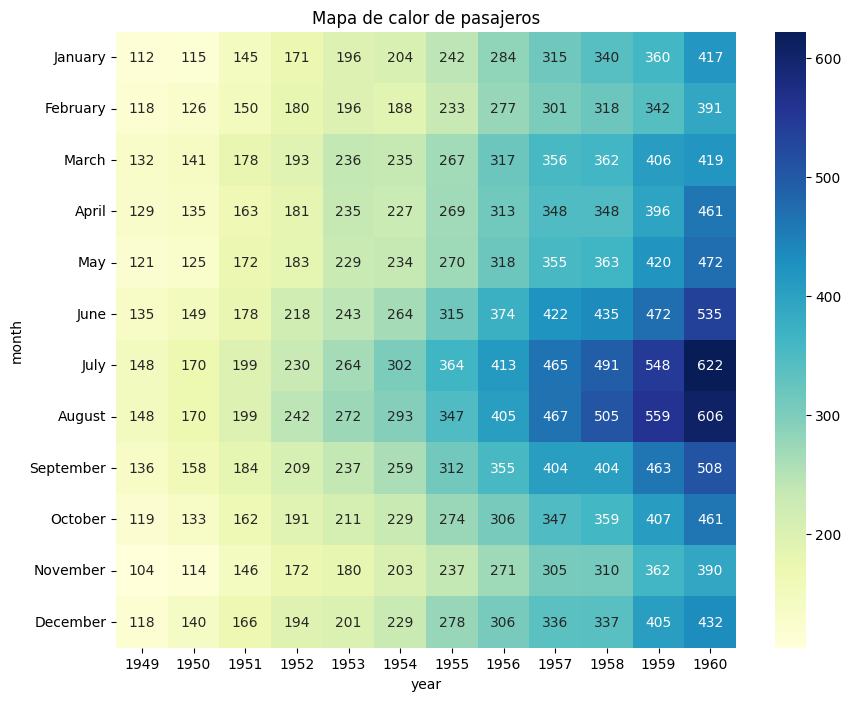

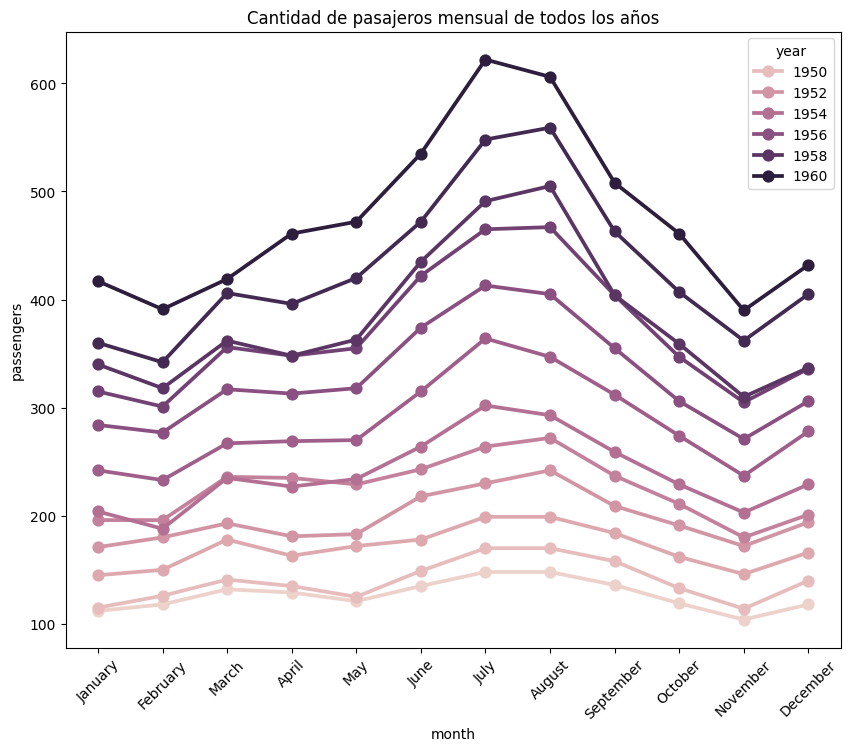

In [ ]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

flight = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/prog_datasci_8/data/flights_passengers.csv")

# cargamos el conjunto de datos y mostramos las últimas 5 líneas, lo hacemos
# con la función <tail> que ya hemos utilizado anteriormente
# aunque en la documentación dice función, en realidad se trataría de un método,
# porque acompaña al objeto <flight>, así que suponemos que se trata de una
# forma de llamarlo también, considerando que es una función en tanto que
# realiza una función, en este caso seleccionar las últimas filas del "df"
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html

print(flight.tail())

# ordenamos los meses cronológicamente ya que si no lo hacemos saldrán
# desordenados, para ellos convertimos la columna <month> en categórica, ya que
# originalmente era de tipo <object>, utilizamos:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html
# de este modo mantenemos el orden que nos interesa, algo que con <astype> no
# sería posible porque ordenaría los meses alfabéticamente
# "Order is defined by the order of the categories, not lexical order of the values."

meses_ord = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
flight["month"] = pd.Categorical(flight["month"], categories=meses_ord, ordered=True)

# mostramos los datos utilizando un gráfico tipo mapa de calor
# encontramos la información necesaria en el enlace proporcionado:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://seaborn.pydata.org/generated/seaborn.heatmap.html#:~:text=glue%20%3D%20sns.load_dataset(%22glue%22).pivot(index%3D%22Model%22%2C%20columns%3D%22Task%22%2C%20values%3D%22Score%22)%0Asns.heatmap(glue)

plt.figure(figsize=(10,8))
sns.heatmap(flight.pivot(index="month", columns="year", values="passengers"), annot=True, fmt="d", cmap='YlGnBu')
# la función <pivot> lo que hace es colocar en las filas los meses, abajo los
# años y colorear con los valores "passengers", dicho de otra forma, organizamos
# los datos/columnas como más interese
plt.title("Mapa de calor de pasajeros")
plt.show()

# en cuanto a la conclusiones, en primer lugar podemos decir que el número de
# pasajeros utilizando el avión ha ido aumentando de manera constante desde 1949
# hasta 1960, algo consistente con la siguiente información en la web:
# https://edition.cnn.com/travel/article/golden-age-flying-really-like/index.html
# según parece, se trata del  periodo conocido como la "Golden Age"
# este aumento se puede comprobar de manera mucho más clara aún en el segundo
# de los mapas, en donde encontramos para cada año una línea que cada vez se
# encarama hacia las posiciones máximas en los años 59 y 60 respectivamente
# en segundo lugar, también destaca el aumento de pasajeros durante los meses
# de julio y agosto, siendo 1959 y 1960 los de mayor afluencia
# se podría deducir que este incremento se debe (suponiendo que seguimos hablando
# de los EEUU) al acelerón económico tras la Segunda Guerra Mundial que, entre
# otras, permitió el  acceso de las clases medias americanas a servicios antes
# imposibles por su elevado coste, todo ello gracias a la popularización de los
# medios de transporte en general, a la modernización de los aviones, y a la
# reducción de costes en la industria aeronaútica, como es de suponer:
# https://en.wikipedia.org/wiki/Post-war_aviation


# mostramos los datos utilizando un gráfico de puntos ("pointplot")
# giramos a 45˚ los nombres de los meses para que se visualicen con claridad

plt.figure(figsize=(10,8))
sns.pointplot(x="month", y="passengers", hue="year", data=flight)
plt.title("Cantidad de pasajeros mensual de todos los años")
plt.xticks(rotation=45)
plt.show()

# con el fin de evitar una nueva advertencia de <matplotlib>, hemos utilizado
# las palabras clave para la función <pivot> "index, columnas, values"
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot.html
